<a href="https://colab.research.google.com/github/sheroukelsayed/Applied-deeplearning/blob/main/Deeplearning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras import backend as k


In [2]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [4]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [5]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255

In [7]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=10)


In [9]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [10]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D




In [11]:
batch_size = 32
epochs = 15
num_classes = 10


In [12]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=(28,28,1),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),padding='same'))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 100)               1081700   
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

In [13]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [14]:
model_train =model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/15
1500/1500 [==============================] - 12s 3ms/step - loss: 0.3760 - accuracy: 0.8662 - val_loss: 0.2809 - val_accuracy: 0.8977
Epoch 2/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2335 - accuracy: 0.9147 - val_loss: 0.2512 - val_accuracy: 0.9097
Epoch 3/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1795 - accuracy: 0.9334 - val_loss: 0.2309 - val_accuracy: 0.9178
Epoch 4/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1360 - accuracy: 0.9494 - val_loss: 0.2649 - val_accuracy: 0.9117
Epoch 5/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1037 - accuracy: 0.9610 - val_loss: 0.2671 - val_accuracy: 0.9156
Epoch 6/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0770 - accuracy: 0.9718 - val_loss: 0.3084 - val_accuracy: 0.9180
Epoch 7/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0580 - accuracy: 0.9783 - val_loss: 0.3058 - val_accuracy

In [16]:
model.save("fashion_model.h5")

In [17]:
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.5265 - accuracy: 0.9191


In [18]:
test_eval[0]

0.526506245136261

In [19]:
test_eval[1]

0.9190999865531921

In [21]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

from keras.models import load_model

In [22]:
fashion_model = load_model('/content/fashion_model.h5')

In [23]:
filename="sample_image.png"

In [24]:
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0

/usr/local/lib/python3.10/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


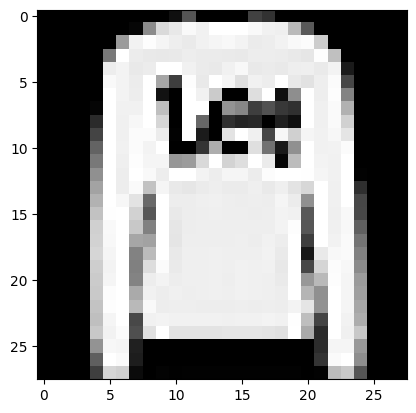

In [32]:
plt.imshow(img.reshape(28,28), cmap='gray', interpolation='none')

In [ ]:
img.imshow()

In [25]:
pred=fashion_model.predict(img)

1/1 [==============================] - 0s 131ms/step


In [29]:
predict_image=np.argmax(pred)

In [31]:
print(predict_image)

2
